### Exercise: Stressed Cells
Sample preparation can lead to artificial changes in the transcriptome of live cells, based on their reaction to the the changes in environment, temperature fluctuations, loss of niche signalling etc. This is an important confounding factor to keep in mind when analysing your data.

This exercise uses the same data set as the basic workflow exercise (reduced PBMC object).

Research which (groups of) genes are known to be upregulated during sample preparation in PBMCs.

#### Import required packages and data
We will import the processed and annotated object that we generated before.

In [1]:
# general data handling
import numpy as np
import pandas as pd
from scipy import sparse

# single cell analysis
import scanpy as sc
import decoupler as dc

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the annotated object
adata = sc.read_h5ad('../Day2/PBMC_annotated.h5ad')

In [3]:
# basic information about the object is displayed if you enter 'adata' and execute the cell
adata

AnnData object with n_obs × n_vars = 1923 × 14395
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes', 'leiden', 'leiden_res0.5', 'leiden_res1', 'leiden_res4', 'leiden_res2', 'leiden_res2.5', 'leiden_res3', 'leiden_res6', 'cell_type', 'celltypist'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_type_colors', 'celltypist_colors', 'dendrogram_leiden', 'dendrogram_leiden_res1', 'hvg', 'leiden', 'leiden_colors', 'leiden_res0.5', 'leiden_res0.5_colors', 'leiden_res1', 'leiden_res1_colors', 'leiden_res2', 'leiden_res2.5', 'leiden_res3', 'leiden_res3_colors', 

In [4]:
# get an object of type list of all gene names in the dataset
gene_list = adata.var_names.tolist()

In [5]:
# research a few groups of genes that are associated with stress response,
# one example are FOS family genes. Extract each such family into a list.
fos_genes = [gene for gene in gene_list if 'FOS' in gene]
jun_genes = [gene for gene in gene_list if 'JUN' in gene]
hsp_genes = [gene for gene in gene_list if 'HSP' in gene]

In [6]:
# inspect these lists, and combine them into a master list stressed_genes
# lists can be combined using the + symbol
print(fos_genes)
print(jun_genes)
print(hsp_genes)
stress_genes = fos_genes + jun_genes + hsp_genes

['FOSL2', 'FOSL1', 'FOS', 'FOSB']
['JUN', 'JUNB', 'JUND']
['HSPG2', 'HSPB11', 'HSPA6', 'HSPD1', 'HSPE1', 'HSPBAP1', 'HSPA4L', 'HSPA4', 'HSPA9', 'HSPA1L', 'HSPA1A', 'HSPA1B', 'HSP90AB1', 'HSPB1', 'HSPA5', 'HSPA8', 'HSPA14', 'HSPA14-1', 'HSP90B1', 'HSPH1', 'HSPA2', 'HSP90AA1', 'CARHSP1', 'HSPBP1', 'HSPA13']


In [7]:
# now, we will add a column to the adata.obs dataframe indicating whether a gene is a stress response gene
adata.var["stress"] = adata.var_names.isin(stress_genes)

In [8]:
# we can now use this stress tag in the calculate qc metrics step
# use the function calculate_qc_metrics as before for mitochondrial genes,
# but specify that layer='counts' needs to be used for calculations
# here, since the data in adata.X has been processed
sc.pp.calculate_qc_metrics(adata, qc_vars=['stress'], layer='counts', inplace=True, log1p=True)

In [9]:
# check which items have been added to adata.obs by inspecting it
adata.obs.head()

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,...,leiden_res4,leiden_res2,leiden_res2.5,leiden_res3,leiden_res6,cell_type,celltypist,total_counts_stress,log1p_total_counts_stress,pct_counts_stress
AAACGAAAGACGTCGA-1,2117,7.658228,7381.0,8.906800,40.902317,50.914510,61.048638,73.933071,841.0,6.735780,...,8,4,4,5,2,bertie botts \n beans,Classical monocytes,115.0,4.753590,1.558054
AAAGAACAGTTCCGTA-1,1407,7.249926,4919.0,8.501063,49.827201,62.695670,71.213661,81.561293,552.0,6.315358,...,6,7,7,6,41,strawberries,Tcm/Naive helper T cells,56.0,4.043051,1.138443
AAAGAACGTTTGTTGG-1,1581,7.366445,7951.0,8.981178,55.955226,71.550748,78.292039,86.404226,711.0,6.568078,...,9,0,0,2,25,blackberries,Tcm/Naive helper T cells,29.0,3.401197,0.364734
AAAGGATGTGTGGTCC-1,1515,7.323831,5160.0,8.548885,46.666667,56.511628,66.414729,79.922481,835.0,6.728629,...,3,6,6,1,18,MAOAM,Classical monocytes,71.0,4.276666,1.375969
AAAGGATTCTGCGGGT-1,1857,7.527256,6226.0,8.736650,46.450369,57.661420,65.868937,76.774815,498.0,6.212606,...,7,10,10,12,5,raspberries,Tem/Trm cytotoxic T cells,20.0,3.044523,0.321234


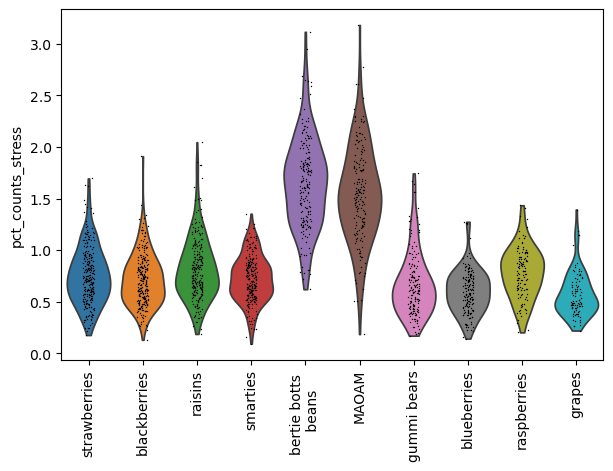

In [10]:
# use scanpy's violin plot to plot the percentage of stresse gene reads per cell type
sc.pl.violin(adata, 'pct_counts_stress', groupby='cell_type', rotation=90)

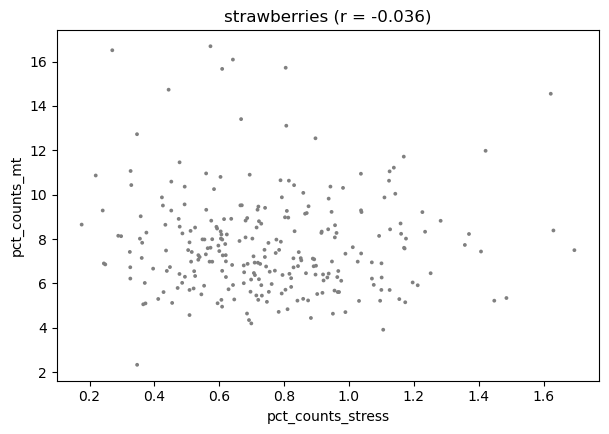

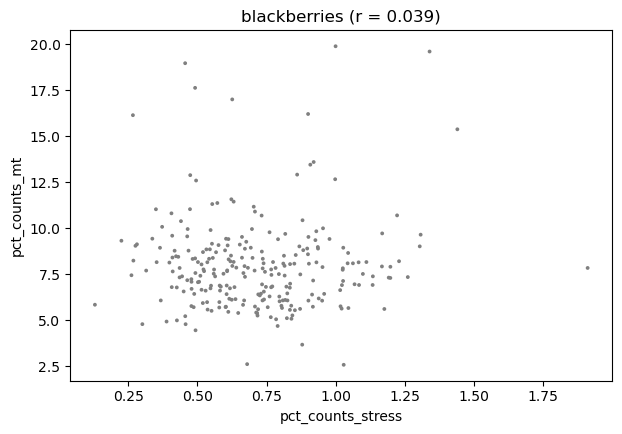

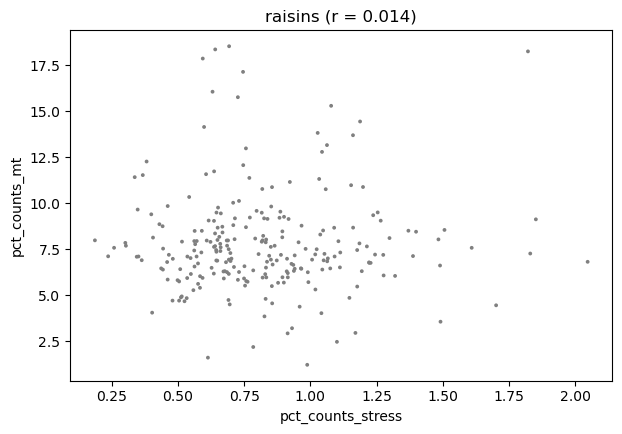

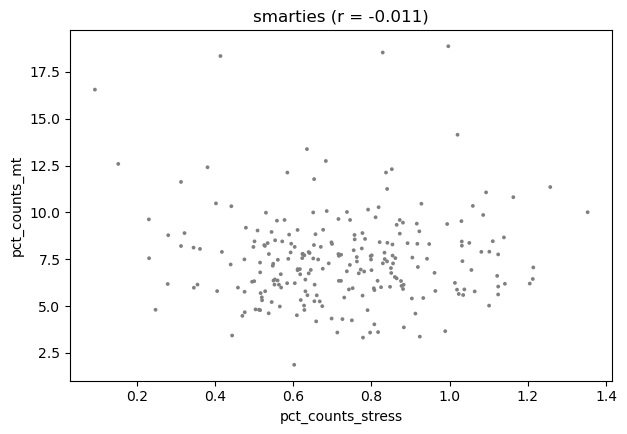

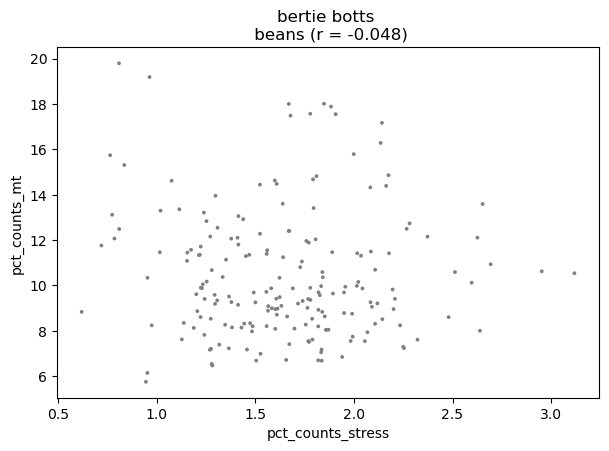

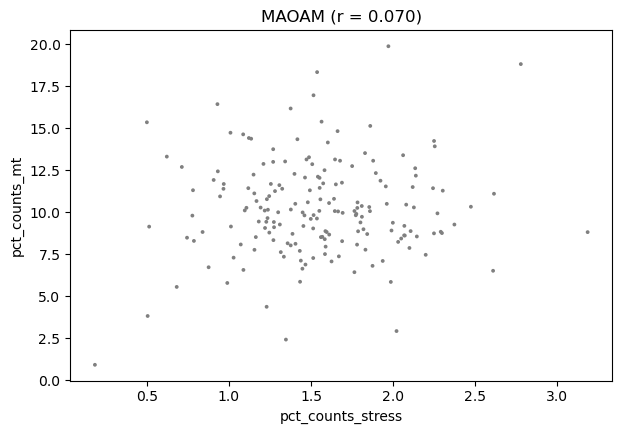

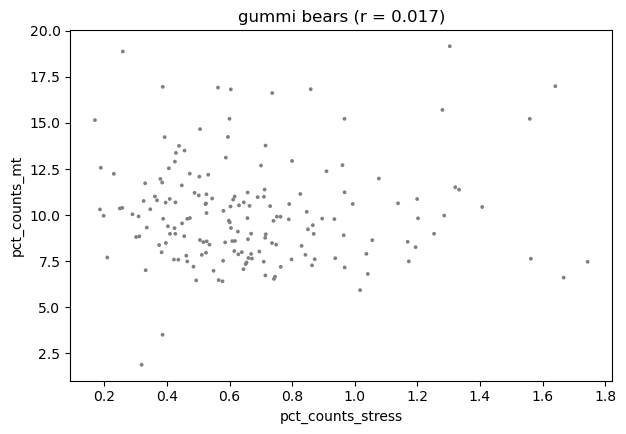

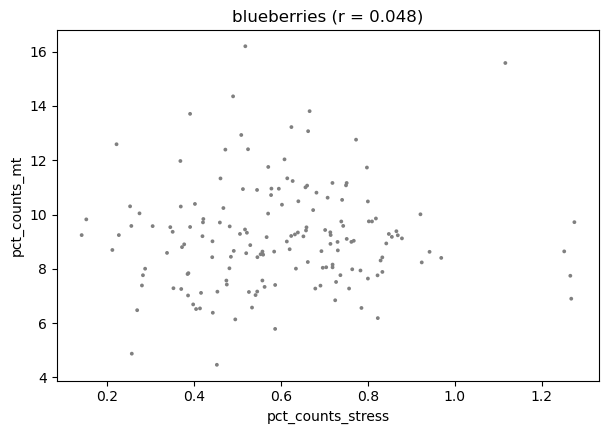

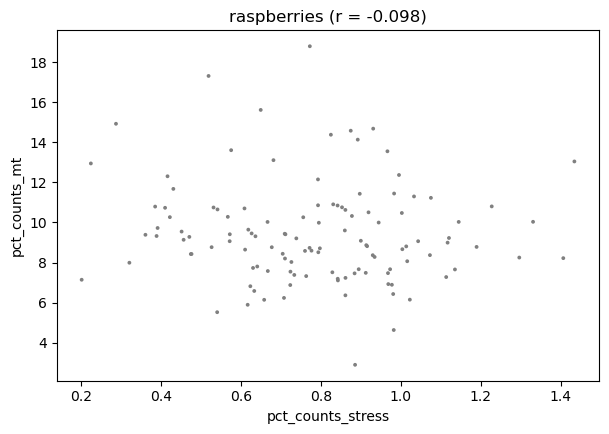

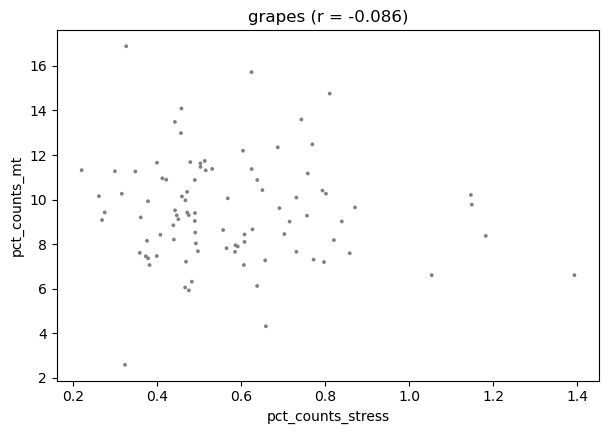

In [11]:
# below, we have prepared a loop for you which goes through each
# population in the cell_type column, subsets the anndata object
# to that population and calculates a correlation between the percentages
# of stressed counts and mitochondrial counts
# please explain to yourself what each line of code does, and then
# add a scatter plot at the end of the loop as described below
for ct in adata.obs['cell_type'].cat.categories:
    # Subset data for this cell type
    adata_sub = adata[adata.obs['cell_type'] == ct]
    
    # Calculate correlation
    corr = adata_sub.obs[['pct_counts_stress', 'pct_counts_mt']].corr().iloc[0, 1]
    
    # Plot scatter for this cell type using scanpy's scatter plot function,
    # include the celltype name and the Pearson correlation calculated above (corr)
    # in the title by using f strings and the function's title parameter
    sc.pl.scatter(adata_sub, x='pct_counts_stress', y='pct_counts_mt', 
                  title=f'{ct} (r = {corr:.3f})', size=30)

#### Questions
1. Does the stress count percentage correlate with mitochondrial read content? What could a correlation imply? What could no correlation imply?
2. Is it a viable strategy to remove these genes entirely from the count matrix or is there an argument against doing that? Discuss.
